In [1]:
import numpy as np
from desc_dc2_dm_data import REPOS
from lsst.daf.persistence import Butler
import lsst.geom as geom
from astropy.table import vstack
from tqdm.notebook import tqdm

In [2]:
repo = REPOS['2.2i_dr6_wfd']
butler = Butler(repo)

/tmp/ipykernel_50081/2973217506.py:2: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = Butler(repo)
/tmp/ipykernel_50081/2973217506.py:2: FutureWarning: Gen2 Butler has been deprecated (ImsimMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = Butler(repo)


lsst.CameraMapper INFO: Loading exposure registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/registry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/CALIB/calibRegistry.sqlite3
lsst.LsstCamMapper WARN: Unable to find valid calib root directory
lsst.CameraMapper INFO: Loading calib registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading exposure registry from /global/cfs/cdirs/lsst/shared/DC2-prod/Run2.2i/desc_dm_drp/v19.0.0/registry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /global/cfs/cdi

In [3]:
skymap = butler.get("deepCoadd_skyMap")

In [4]:
tractInfo = skymap[4030]

In [13]:
bbox = geom.Box2I(geom.Point2I(0, 0), geom.Point2I(1, 1))

In [18]:
bbox.getMin()+geom.Extent2I(1, 1)

Point2I(1, 1)

In [47]:
data = butler.get(
    "deepCoadd_visitInfo",
    tract=tractInfo.getId(),
    patch='0,0',
    filter='u'
)
data

VisitInfo(exposureId=0, exposureTime=nan, darkTime=nan, date=<invalid>, UT1=nan, ERA=nan rad, boresightRaDec=(nan, +nan), boresightAzAlt=(nan, +nan), boresightAirmass=nan, boresightRotAngle=nan rad, rotType=0, observatory=nanW, nanN  nan, weather=Weather(nan, nan, nan), instrumentLabel='', id=0)

In [42]:
import matplotlib.pyplot as plt

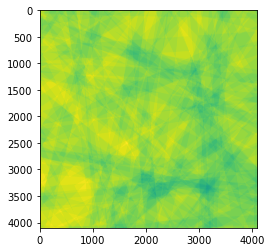

In [44]:
plt.imshow(data.image.array)

In [48]:
ccds = []
for ipatch in tqdm(range(49)):
    patchInfo = tractInfo.getPatchInfo(ipatch)
    for filt in 'ugrizy':
        bbox = butler.get(
            "deepCoadd_bbox",
            tract=tractInfo.getId(),
            patch="%d,%d"%patchInfo.getIndex(),
            filter=filt            
        )
        bbox = geom.Box2I(bbox.getMin(), bbox.getMin()+geom.Extent2I(1, 1))
        coadd = butler.get(
            "deepCoadd_sub",
            bbox=bbox,
            tract=tractInfo.getId(),
            patch="%d,%d"%patchInfo.getIndex(),
            filter=filt
        )
        ccds.append(coadd.getInfo().getCoaddInputs().ccds.asAstropy())

  0%|          | 0/49 [00:00<?, ?it/s]

In [49]:
table = vstack(ccds)

In [52]:
table.write("tract4030ccds.fits")

In [15]:
dataIds = set()
for row in table:
    dataIds.add((
        int(row['id']),
        int(row['visit']),
        int(row['ccd'])
    ))
dataIds = sorted(dataIds)
len(dataIds)

28494

In [16]:
# How many unique visits are there?
len(np.unique([d[1] for d in dataIds]))

1127

In [11]:
# Each (visit) instance catalog is ~5GB.  Implies I want 140 TB available, but can delete as I go.
# Each (visit,ccd) raw+centroid is 23MB.  Implies I want 165 GB for raw+centroid
# Processed through calexp is 117MB.  Implies I want 842 GB for calexp+icSrc+src+etc.
# Need to estimate processing:
#  - Time to resimulate: ~1 hour => 7202 hours
#  - Time for processCcd.py: ~10 min => 1200 hours
#  - Time for processCcdWithFakes.py: 10 min => 1200 hours

In [12]:
len(dataIds)

28494

In [18]:
[d for d in dataIds if d[1]==40325]

[(40325074, 40325, 74),
 (40325077, 40325, 77),
 (40325080, 40325, 80),
 (40325081, 40325, 81),
 (40325082, 40325, 82),
 (40325083, 40325, 83),
 (40325084, 40325, 84),
 (40325085, 40325, 85),
 (40325086, 40325, 86),
 (40325087, 40325, 87),
 (40325088, 40325, 88),
 (40325089, 40325, 89),
 (40325090, 40325, 90),
 (40325091, 40325, 91),
 (40325092, 40325, 92),
 (40325093, 40325, 93),
 (40325094, 40325, 94),
 (40325095, 40325, 95),
 (40325096, 40325, 96),
 (40325097, 40325, 97),
 (40325098, 40325, 98),
 (40325102, 40325, 102),
 (40325105, 40325, 105),
 (40325119, 40325, 119),
 (40325122, 40325, 122),
 (40325125, 40325, 125),
 (40325126, 40325, 126),
 (40325127, 40325, 127),
 (40325128, 40325, 128),
 (40325129, 40325, 129),
 (40325130, 40325, 130),
 (40325131, 40325, 131),
 (40325132, 40325, 132),
 (40325133, 40325, 133),
 (40325134, 40325, 134),
 (40325135, 40325, 135),
 (40325136, 40325, 136),
 (40325137, 40325, 137),
 (40325138, 40325, 138),
 (40325139, 40325, 139),
 (40325140, 40325, 14